In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

#libs
import matplotlib.pyplot as plt
from matplotlib import colormaps
import numpy as np
import os
import torch
import torchvision

#our classes
import utils #contains sam_utils, visual_utils, and other utility functions
from datasets.dataset_loading import CocoLoader,get_coco_split
import segmentation_models
from detection_models import GroundingDinoTiny

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# CUDA tests
os.environ["CUDA_VISIBLE_DEVICES"] = "0"  # might not be viable, check again!

print("CUDA available:" + str(torch.cuda.is_available()))
from torch.utils.cpp_extension import CUDA_HOME

print("CUDA_HOME:" + str(CUDA_HOME))
current_device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

available_gpus = [torch.cuda.device(i) for i in range(torch.cuda.device_count())]
print(available_gpus)
print(torch.cuda.device_count())

CUDA available:True
CUDA_HOME:/home.stud/svobo114/.conda/envs/detect_env_clone
1


In [4]:
transforms = None
coco_train_dataset = CocoLoader(get_coco_split(split="val"), transform=transforms)

loading annotations into memory...
Done (t=1.03s)
creating index...
index created!


In [34]:
all_classes=coco_train_dataset.get_classes()
gd = GroundingDinoTiny(device="cuda", cfg=None, all_classes=all_classes)

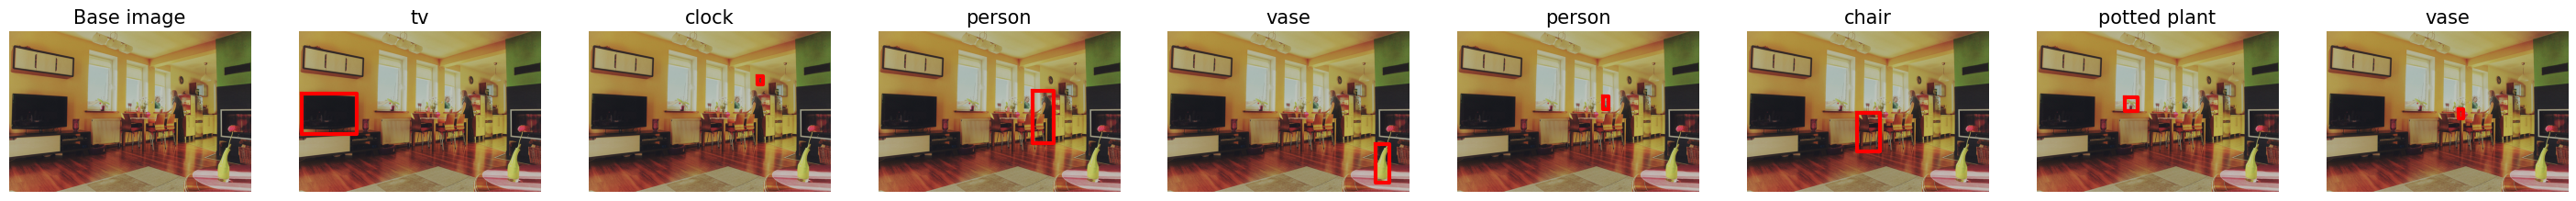

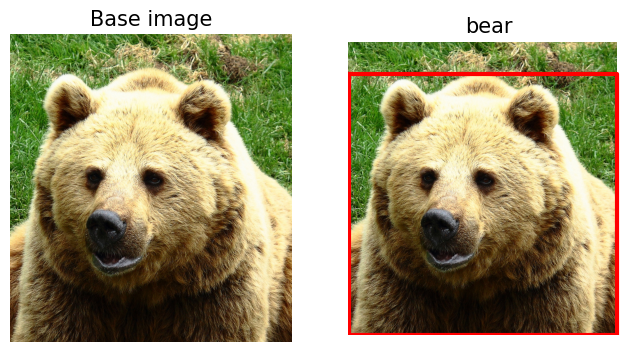

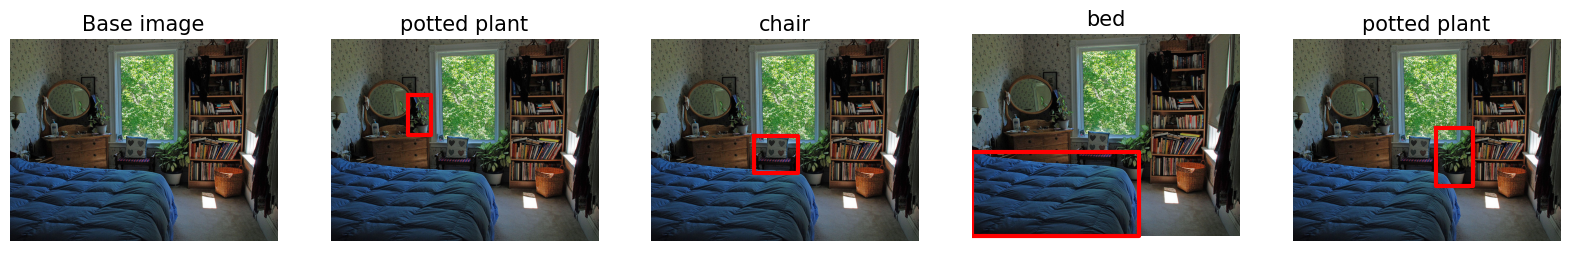

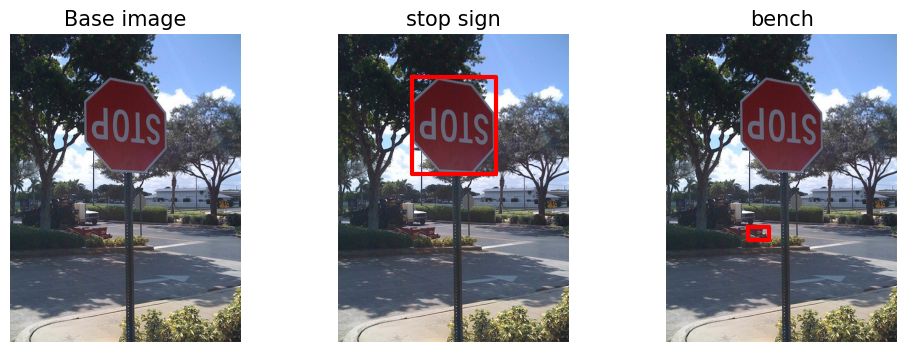

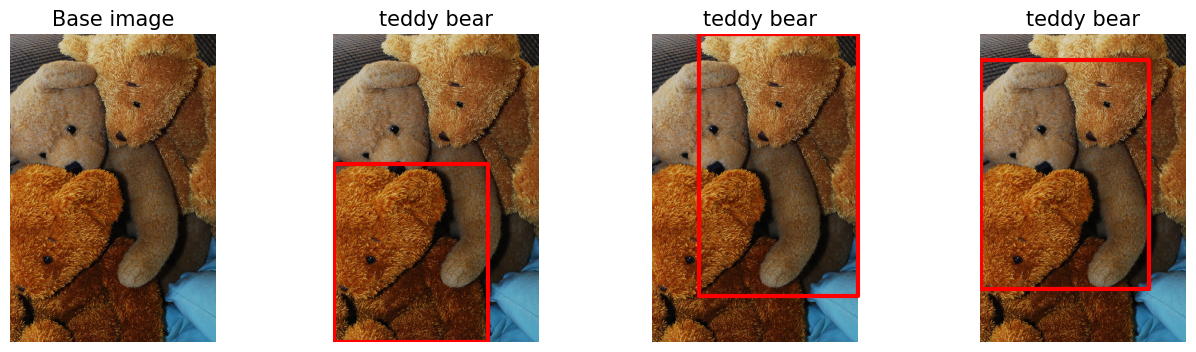

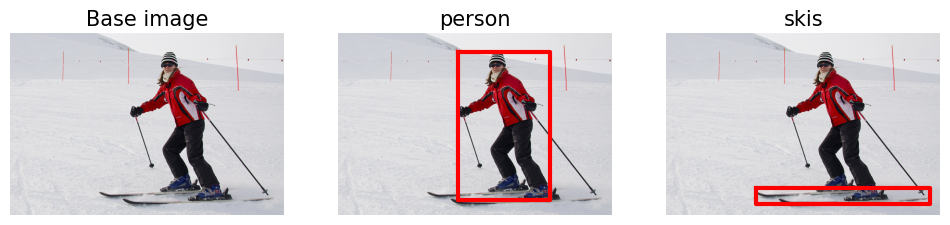

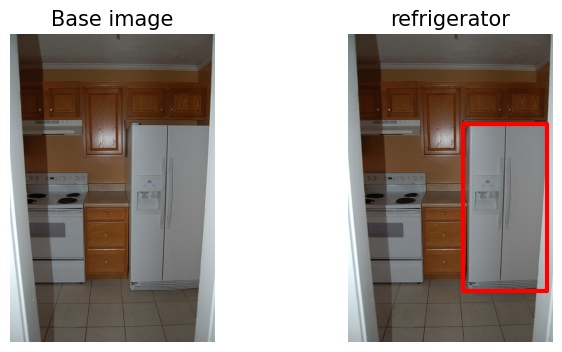

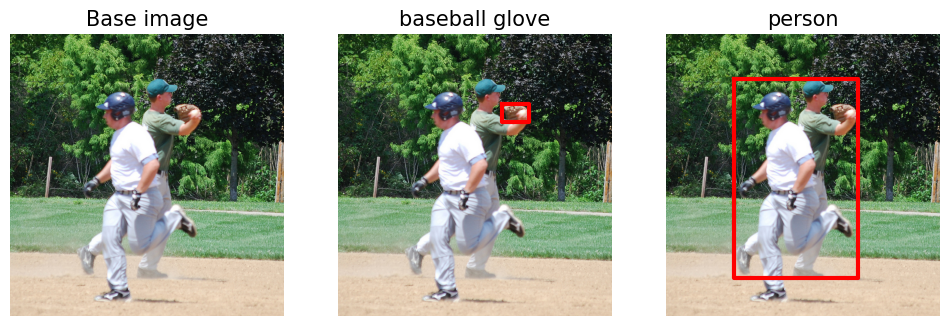

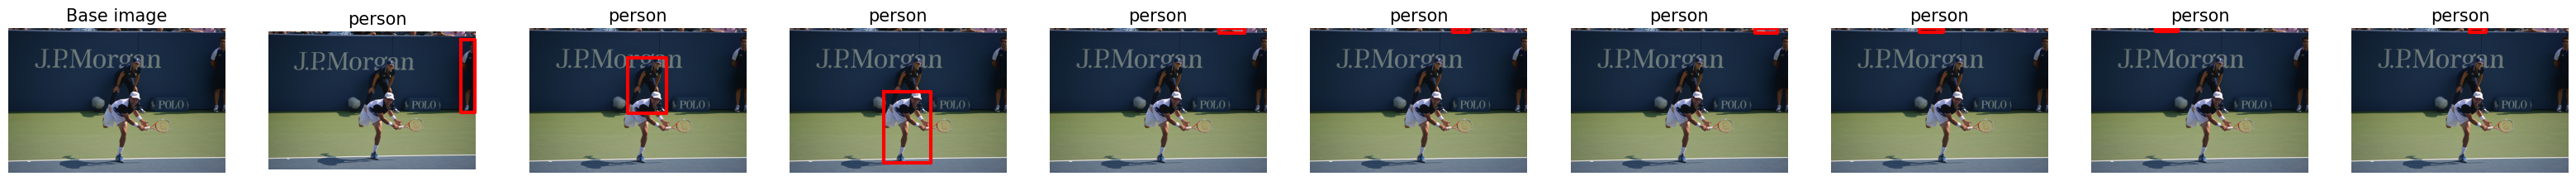

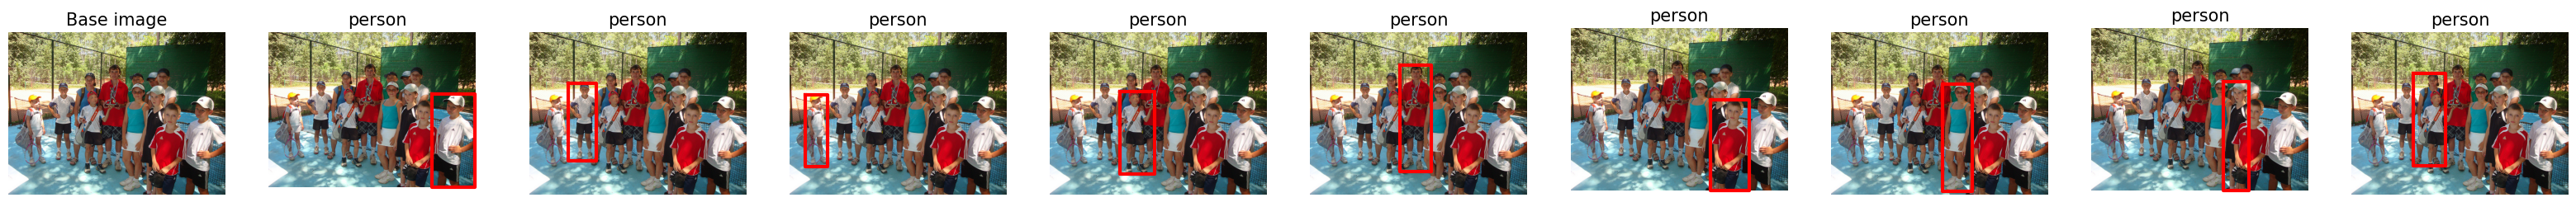

In [36]:
to_show = 10
offset = 0  # from the beginning of the dataset

# loads the wanted images
items = coco_train_dataset.get_amount(amount=to_show, offset=offset)

results = gd.detect_boxes(items)
# Visualize the results
for result,item in zip(results,items):
    image = item["image"]
    boxes = result["boxes"]
    labels = gd.indices_to_classes(result["labels"])

    utils.grid_masks_boxes(
        image=image, boxes =boxes, titles=labels, scale=4
    )